<a href="https://colab.research.google.com/github/SHermukhammadjon/Classically_Punk/blob/main/classically_punk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# ! pip install numpy
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install tensorflow
# ! pip install tensorflow-io
# ! pip install librosa
# ! pip install wget

# Classically Punk


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import tensorflow as tf
import tensorflow_io as tfio
from  IPython.display import Audio
import librosa
import librosa.display
import wget
from tqdm import tqdm
from datetime import datetime

## 1. Data colecting

### 1.1 Load Dataset  `(It takis to many time)`

In [3]:
def load_dataset(url):
  start = datetime.now()
  wget.download(url)
  print(f"Dataset sucsefuly downloaded\nrun time : {datetime.now() - start}")

In [4]:
load_dataset("https://storage.googleapis.com/qwasar-public/track-ds/classically_punk_music_genres.tar.gz")

Dataset sucsefuly downloaded
run time : 0:00:30.819383


### 1.2 Opening the dataset

In [7]:
def open_dataset(file_path : str = "classically_punk_music_genres.tar.gz"):
  start = datetime.now()
  file = tarfile.open(file_path)
  file.extractall()
  file.close()
  print(f"Dataset Sucsefuly opened\nrun time : {datetime.now() - start}")

In [8]:
open_dataset("classically_punk_music_genres.tar.gz")

Dataset Sucsefuly opened
run time : 0:00:16.970522


### Get Dataset audio file path as Pandas DatFrame

In [9]:
def colect_audios_path(floder : str):
  geners = [dr for dr in os.listdir(f"./{floder}") if '.' not in dr]
  data = {'file_path' : [], 'gener' : []}
  for gener in geners:
    for file in os.listdir(f"./{floder}/{gener}"):
      data['file_path'].append(f"./{floder}/{gener}/{file}")
      data['gener'].append(gener)
  return pd.DataFrame(data)

In [10]:
df = colect_audios_path("genres")
df

,file_path,gener
0,./genres/classical/classical.00001.wav,classical
1,./genres/classical/classical.00054.wav,classical
2,./genres/classical/classical.00015.wav,classical
3,./genres/classical/classical.00078.wav,classical
4,./genres/classical/classical.00062.wav,classical
...,...,...
995,./genres/reggae/reggae.00042.wav,reggae
996,./genres/reggae/reggae.00096.wav,reggae
997,./genres/reggae/reggae.00097.wav,reggae
998,./genres/reggae/reggae.00044.wav,reggae


In [11]:
Audio("./genres/metal/metal.00022.wav")

In [236]:
feature_30_sec = pd.read_csv("https://drive.google.com/uc?id=1_HYaraVC6S_iltHzOhbwN_dyE7VGGRu2")
feature_3_sec = pd.read_csv("https://drive.google.com/uc?id=1XO7DVQwjAFBZNchzStCrorqP1xWJm3Js")
feature_3_sec

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [12]:
def audio_feature_extractor(audio_file_path):
  audio, sample_rate = librosa.load(audio_file_path)
  mffccs = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
  mffccs_scaled_features = np.mean(mffccs.T, axis = 0)
  return mffccs_scaled_features

In [13]:
data = []

for file in df.file_path:
  data.append(audio_feature_extractor(file))

In [14]:
df['music'] = data

In [71]:
df = df[['file_path', 'music', 'gener']]
df

,file_path,music,gener
0,./genres/classical/classical.00001.wav,"[-324.09128, 133.56267, -25.030157, 24.55361, ...",classical
1,./genres/classical/classical.00054.wav,"[-108.06734, 127.27673, -44.952744, 31.253359,...",classical
2,./genres/classical/classical.00015.wav,"[-449.5024, 124.97929, -19.903538, 27.45521, -...",classical
3,./genres/classical/classical.00078.wav,"[-552.1586, 173.31636, 26.347733, 14.1246195, ...",classical
4,./genres/classical/classical.00062.wav,"[-305.44928, 135.9327, -11.758563, 18.213852, ...",classical
...,...,...,...
995,./genres/reggae/reggae.00042.wav,"[-174.87035, 79.32584, -24.305243, 17.970098, ...",reggae
996,./genres/reggae/reggae.00096.wav,"[-166.97626, 116.62674, -44.220535, 70.51435, ...",reggae
997,./genres/reggae/reggae.00097.wav,"[-142.80992, 103.12614, -15.227189, 38.256912,...",reggae
998,./genres/reggae/reggae.00044.wav,"[-104.17264, 83.90962, 18.852966, 28.91025, 10...",reggae


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [127]:
y = np.array(pd.get_dummies(df.gener))
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [183]:
geners = pd.get_dummies(df.gener).columns
geners[6]

'metal'

In [77]:
X = np.array(df.music.tolist())
Y = np.array(df.gener.tolist())

labelencoder = LabelEncoder()
df['gener_id'] = labelencoder.fit_transform(Y)
Y = to_categorical(labelencoder.fit_transform(Y))

In [86]:
x_train, x_test, y_train, y_test = train_test_split(tf.expand_dims(X, -1).numpy(), Y, test_size = 0.2)

In [88]:
x_train.shape

(800, 40, 1)

In [89]:
y_train.shape

(800, 10)

# ML

In [90]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [91]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn import metrics

In [93]:
y_train.shape

(800, 10)

In [ ]:
model = Sequential()

model.add(Dense(1024, input_shape = (40, ), activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

#Final layer
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_248 (Dense)           (None, 1024)              41984     
                                                                 
 dropout_192 (Dropout)       (None, 1024)              0         
                                                                 
 dense_249 (Dense)           (None, 512)               524800    
                                                                 
 dropout_193 (Dropout)       (None, 512)               0         
                                                                 
 dense_250 (Dense)           (None, 256)               131328    
                                                                 
 dropout_194 (Dropout)       (None, 256)               0         
                                                                 
 dense_251 (Dense)           (None, 128)             

In [ ]:
128+128

In [114]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(40, 1)))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))


# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 38, 64)            256       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 19, 64)           256       
 hNormalization)                                                 
                                                                 
 flatten_5 (Flatten)         (None, 1216)              0         
                                                                 
 dense_15 (Dense)            (None, 256)               311552    
                                                                 
 dense_16 (Dense)            (None, 128)              

In [115]:
model.compile('Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [116]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from datetime import datetime

checkpointer = ModelCheckpoint('models/sequential.hdf5', save_best_only = True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_data = (x_test, y_test), callbacks = [checkpointer])

print(f"Runtime {datetime.now() - start}")


Epoch 1/100
80/80 [==============================] - 3s 14ms/step - loss: 1.8171 - accuracy: 0.3900 - val_loss: 1.9442 - val_accuracy: 0.3200
Epoch 2/100
80/80 [==============================] - 1s 10ms/step - loss: 1.3728 - accuracy: 0.5063 - val_loss: 1.6239 - val_accuracy: 0.4950
Epoch 3/100
80/80 [==============================] - 1s 9ms/step - loss: 1.2312 - accuracy: 0.5575 - val_loss: 1.3947 - val_accuracy: 0.5100
Epoch 4/100
80/80 [==============================] - 1s 9ms/step - loss: 1.1262 - accuracy: 0.6100 - val_loss: 1.4309 - val_accuracy: 0.4950
Epoch 5/100
80/80 [==============================] - 1s 10ms/step - loss: 1.0064 - accuracy: 0.6413 - val_loss: 1.3015 - val_accuracy: 0.5350
Epoch 6/100
80/80 [==============================] - 1s 10ms/step - loss: 0.8871 - accuracy: 0.6775 - val_loss: 1.4933 - val_accuracy: 0.5550
Epoch 7/100
80/80 [==============================] - 1s 8ms/step - loss: 0.7987 - accuracy: 0.7113 - val_loss: 1.4140 - val_accuracy: 0.5300
Epoch 8/1

In [118]:
model.evaluate(x_test, y_test, return_dict = True)

7/7 [==============================] - 0s 4ms/step - loss: 3.1600 - accuracy: 0.6250


{'loss': 3.159950017929077, 'accuracy': 0.625}

In [188]:
df

,file_path,music,gener,gener_id
0,./genres/classical/classical.00001.wav,"[-324.09128, 133.56267, -25.030157, 24.55361, ...",classical,1
1,./genres/classical/classical.00054.wav,"[-108.06734, 127.27673, -44.952744, 31.253359,...",classical,1
2,./genres/classical/classical.00015.wav,"[-449.5024, 124.97929, -19.903538, 27.45521, -...",classical,1
3,./genres/classical/classical.00078.wav,"[-552.1586, 173.31636, 26.347733, 14.1246195, ...",classical,1
4,./genres/classical/classical.00062.wav,"[-305.44928, 135.9327, -11.758563, 18.213852, ...",classical,1
...,...,...,...,...
995,./genres/reggae/reggae.00042.wav,"[-174.87035, 79.32584, -24.305243, 17.970098, ...",reggae,8
996,./genres/reggae/reggae.00096.wav,"[-166.97626, 116.62674, -44.220535, 70.51435, ...",reggae,8
997,./genres/reggae/reggae.00097.wav,"[-142.80992, 103.12614, -15.227189, 38.256912,...",reggae,8
998,./genres/reggae/reggae.00044.wav,"[-104.17264, 83.90962, 18.852966, 28.91025, 10...",reggae,8


In [189]:
audi_file_path = "./genres/classical/classical.00001.wav"

wav, sample_rate = librosa.load(audi_file_path)
mfcc_features = librosa.feature.mfcc(y = wav, sr = sample_rate, n_mfcc = 40)
sacled_mfcc_features = np.mean(mfcc_features.T, axis = 0)
sacled_mfcc_features #.reshape(1, -1)

array([-324.09128   ,  133.56267   ,  -25.030157  ,   24.55361   ,
        -11.939921  ,   17.658503  ,   -5.5186734 ,    1.71689   ,
        -10.575926  ,   -0.86057436,   -7.80522   ,    3.5297625 ,
          5.054664  ,    1.3707235 ,    3.0050094 ,   -3.125152  ,
         -4.2895784 ,    0.59402454,    2.877037  ,    0.37455818,
         -1.2144454 ,    0.76902956,    2.2079852 ,    1.052863  ,
          5.339144  ,    2.526477  ,    3.4166243 ,   -1.2346427 ,
          6.6579523 ,   11.365144  ,   -0.9949531 ,  -11.721296  ,
         -6.2246466 ,    4.2277317 ,    7.017335  ,    5.0720468 ,
          2.5235822 ,   -5.4079676 ,   -6.1680717 ,    0.7645856 ],
      dtype=float32)

In [223]:
# np.argmax(model.predict(x_test),axis=1)
predict = model.predict(x_test[10].reshape(1, -1))

geners[np.argmax(predict)]

1/1 [==============================] - 0s 47ms/step


'classical'

In [224]:
geners[np.argmax(y_test[10])]

'classical'

In [225]:
y_test[30]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [229]:
np.argmax(predict)

1

In [230]:
np.argmax(y_test[10])

1

In [ ]:
# file = tf.io.read_file(df['pop'][0])


In [158]:
def read_waw_mono(file_path : str, rate_out : int = 16_000):
    file = tf.io.read_file(file_path)

    waw, sample_rate = tf.audio.decode_wav(file, desired_channels = 1)
    waw = tf.squeeze(waw, axis = 1)
    sample_rate = tf.cast(sample_rate, dtype = tf.int64) #changing data tensor 32 into tensor 64 type

    waw = tfio.audio.resample(waw, rate_in = sample_rate, rate_out = rate_out)
    return waw

In [159]:
file = tf.io.read_file("./genres/metal/metal.00022.wav")
waw, sample_rate = tf.audio.decode_wav(file, desired_channels = 1)
waw = tf.squeeze(waw, axis = 1)
sample_rate = tf.cast(sample_rate, dtype = tf.int64)

waw

<tf.Tensor: shape=(661504,), dtype=float32, numpy=
array([-0.03897095, -0.06414795, -0.09539795, ..., -0.05166626,
       -0.0802002 , -0.05831909], dtype=float32)>

In [ ]:
pop = read_waw_mono("./genres/metal/metal.00022.wav")
metal = read_waw_mono("./genres/metal/metal.00022.wav")

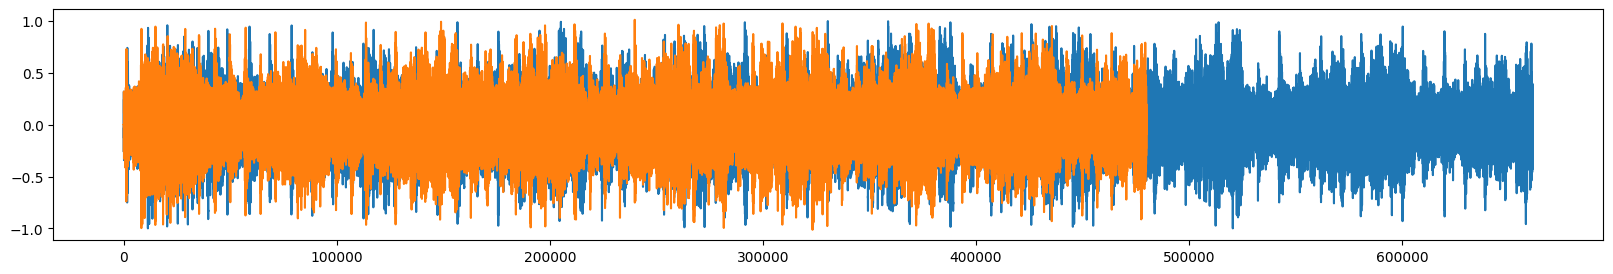

In [ ]:
plt.figure(figsize = (20, 3))
plt.plot(waw)
plt.plot(pop)
plt.show()